## Exploratory data visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

bike_sharing = pd.read_csv('/Users/brindhamanivannan/datasets/day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


The workingday column describes the type of day: a working day or a non-working day (weekend or holiday). A value of 1 represents a working day, and a value of 0 represents a non-working day.

In [2]:
bike_sharing['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

In [3]:
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

The casual and registered columns show us the number of bikes rented by casual and registered users each day.

The workingday column correlates negatively with the casual column and positively correlates with the registered column. These values suggest that registered users tend to use the bikes more on working days — to commute to work probably. On the other side, casual users tend to rent the bikes more on the weekends and holidays — probably for some leisure time.

To corroborate or disprove these observations, we'll calculate the average number of rentals for casual and registered users on working and non-working days.

In [4]:
non_working_day = bike_sharing[bike_sharing['workingday'] == 0]

In [5]:
non_working_day.shape

(231, 16)

In [6]:
bike_sharing.shape

(731, 16)

In [7]:
working_days = bike_sharing[bike_sharing['workingday'] == 1]
working_days.shape

(500, 16)

In [11]:
non_working_day['casual'].mean()

1371.1341991341992

In [12]:
non_working_day['registered'].mean()

2959.034632034632

In [13]:
working_days['casual'].mean()

606.57

In [14]:
working_days['registered'].mean()

3978.25

## Bar plots

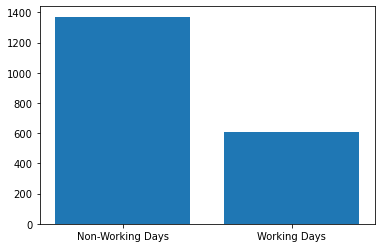

In [15]:
import matplotlib.pyplot as plt

working_days = ['Non-Working Days', 'Working Days']
casual_avg = [1371, 607]

plt.bar(working_days, casual_avg)
plt.show()

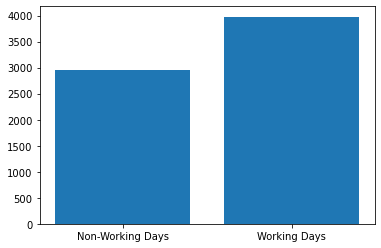

In [16]:
import matplotlib.pyplot as plt
working_days = ['Non-Working Days', 'Working Days']
registered_avg = [2959, 3978]

plt.bar(working_days, registered_avg)
plt.show()

## Customizing bar plots

We'll also take a more granular approach to analyzing the data and examine the average number of rentals for casual and registered users based on the day of the week (Monday, Tuesday, Wednesday, etc.)

In [17]:
# We use Series.sort_index() to sort the index in an ascending order
bike_sharing['weekday'].value_counts().sort_index()


0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: weekday, dtype: int64

In [20]:
zero = bike_sharing[bike_sharing['weekday'] == 0]
print(zero['casual'].mean())
print(zero['registered'].mean())

1338.2952380952381
2890.5333333333333


In [ ]:
# weekday_averages

weekday,casual,registred
0,1338.295238,2890.533333
1,674.133333,3663.990476
2,556.182692,3954.480769
3,551.144231,3997.394231
4,590.961538,4076.298077
5,752.288462,3938.000000
6,1465.257143,3085.285714



In [25]:
weekday_avg = bike_sharing.groupby('weekday').mean()[['casual', 'registered']].reset_index()
weekday_avg

,weekday,casual,registered
0,0,1338.295238,2890.533333
1,1,674.133333,3663.990476
2,2,556.182692,3954.480769
3,3,551.144231,3997.394231
4,4,590.961538,4076.298077
5,5,752.288462,3938.000000
6,6,1465.257143,3085.285714


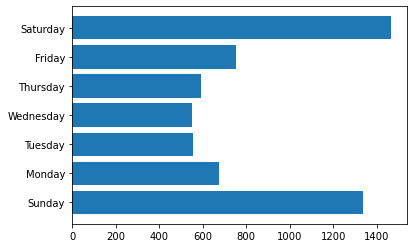

In [27]:
plt.barh(weekday_avg['weekday'], weekday_avg['casual'])
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'])
plt.show()

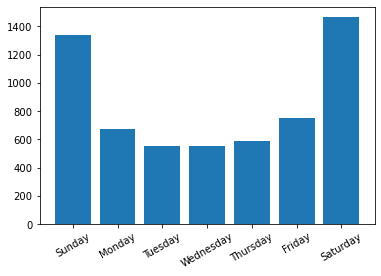

In [28]:
plt.bar(weekday_avg['weekday'], weekday_avg['casual'])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'],
          rotation=30)
plt.show()

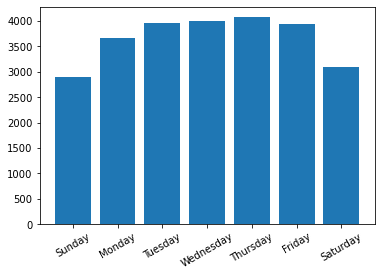

In [29]:
plt.bar(weekday_avg['weekday'], weekday_avg['registered'])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'],
          rotation=30)
plt.show()

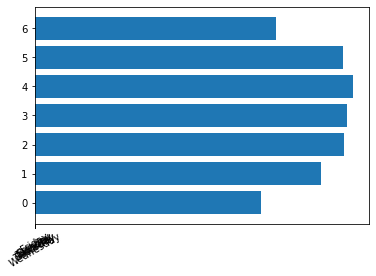

In [30]:
plt.barh(weekday_avg['weekday'], weekday_avg['registered'])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'],
          rotation=30)
plt.show()

## Frequency tables

In [32]:
bike_sharing['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

Column weathersit describes the daily weather type.

We only see three unique values above, but, according to the documentation, the weathersit column has four unique values (4 has a frequency of zero as a consequence):

1: clear or few clouds

2: mist or cloudy

3: light rain, light snow, thunderstorm

4: heavy rain, snow, ice pellets, fog

The best way to visualize a frequency table is by using a bar plot.

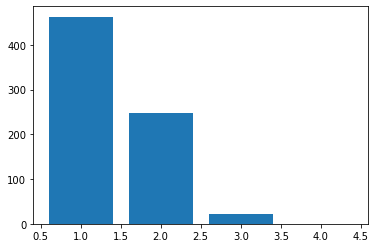

In [33]:
weather_types = [1, 2, 3, 4]
frequencies = [463, 247, 21, 0]
plt.bar(weather_types, frequencies)
plt.show()

Bar plots work especially well for visualizing frequency tables when the number of unique values is low.

If there are many unique values, then the bar plot looks too crowded, and it becomes more difficult to see any pattern.

Bar plots work well when generating the frequency tables for categorical columns. For numerical columns, we need to use a histogram

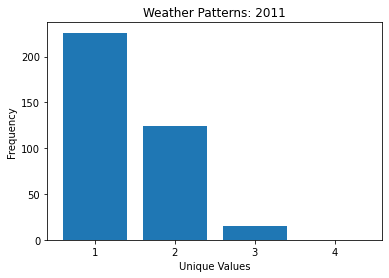

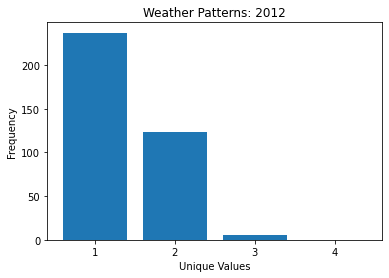

In [34]:
import matplotlib.pyplot as plt

unique_values = [1, 2, 3, 4]
weather_2011 = [226, 124, 15, 0]
weather_2012 = [237, 123, 6, 0]

plt.bar(unique_values, weather_2011)
plt.xticks(ticks=[1,2,3,4])
plt.title('Weather Patterns: 2011')
plt.ylabel('Frequency')
plt.xlabel('Unique Values')
plt.show()

plt.bar(unique_values, weather_2012)
plt.xticks(ticks=[1,2,3,4])
plt.title('Weather Patterns: 2012')
plt.ylabel('Frequency')
plt.xlabel('Unique Values')
plt.show()

## Grouped frequency tables

In [35]:
bike_sharing['cnt'].value_counts()

5119    2
4401    2
1977    2
6824    2
5191    2
       ..
6273    1
5501    1
4760    1
1683    1
4097    1
Name: cnt, Length: 696, dtype: int64

Column cnt has 696 unique values and if we generate a frequency table for the cnt column (which describes the total number of bike rentals), it's almost impossible to distinguish any pattern. 

To solve this problem, we can group the unique values into equal intervals. 

In [36]:
bike_sharing['cnt'].value_counts(bins=10)

(4368.0, 5237.2]    137
(3498.8, 4368.0]    122
(5237.2, 6106.4]     81
(6975.6, 7844.8]     79
(6106.4, 6975.6]     76
(2629.6, 3498.8]     73
(1760.4, 2629.6]     71
(891.2, 1760.4]      62
(7844.8, 8714.0]     17
(13.307, 891.2]      13
Name: cnt, dtype: int64

The unique values are now number intervals. (4368.0, 5237.2] is a number interval. The ( character indicates that the starting number is not included, while the ] indicates that the ending number is included. The interval (4368.0, 5237.2] contains all numbers greater than 4368.0 and less than or equal to 5237.2.



In [37]:
bike_sharing['cnt'].value_counts(bins=10).sort_index()

(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: cnt, dtype: int64

As a side note, the number of intervals in a grouped frequency table can vary — we can have 5, 6, 7, 10, 15, etc. Generally, 10 intervals is a good choice because it offers a good balance between information and comprehension.

In [38]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [39]:
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])


In [40]:
registered_freq = bike_sharing['registered'].value_counts(bins=10).sort_index()
registered_freq

(13.073, 712.6]      14
(712.6, 1405.2]      44
(1405.2, 2097.8]     79
(2097.8, 2790.4]     80
(2790.4, 3483.0]    113
(3483.0, 4175.6]    144
(4175.6, 4868.2]     85
(4868.2, 5560.8]     71
(5560.8, 6253.4]     57
(6253.4, 6946.0]     44
Name: registered, dtype: int64

In [41]:
casual_freq = bike_sharing['casual'].value_counts(bins=10).sort_index()
casual_freq

(-1.4089999999999998, 342.8]    204
(342.8, 683.6]                  144
(683.6, 1024.4]                 165
(1024.4, 1365.2]                 89
(1365.2, 1706.0]                 44
(1706.0, 2046.8]                 23
(2046.8, 2387.6]                 26
(2387.6, 2728.4]                 22
(2728.4, 3069.2]                  9
(3069.2, 3410.0]                  5
Name: casual, dtype: int64

## Histogram

The best way to visualize a grouped frequency table is by using a histogram. 

In [42]:
bike_sharing['cnt'].value_counts(bins=10).sort_index()

(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: cnt, dtype: int64

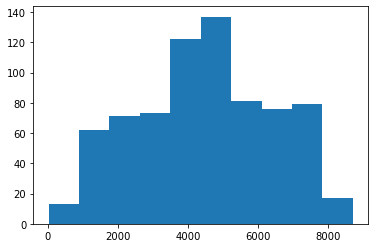

In [43]:
plt.hist(bike_sharing['cnt'])
plt.show()

Notice that all we needed to pass to plt.hist() was the cnt column (not the grouped frequency table).

Behind the curtains, the plt.hist() function did the following:

Generated a grouped frequency table with ten equal intervals for the cnt column.
Plotted a bar for each interval (ten intervals means ten bars). The height of each bar corresponds to the frequency of its corresponding interval.

A histogram is a modified bar plot — the main visual difference is that there are no gaps between bars.

Another equally-important difference is that each bar represents an interval, not a single value.

Looking at the histogram we generated for the cnt column, we can make a few quick observations about the following:

- Range: Over the two years (2011 and 2012), the values ranged between 0 and 9,000 bike rentals.

- The distribution of the bike rentals:

1. Most typically, the number of bike rentals per day varies between 4,500 and 5,000 — the tallest bar is around that interval. The height of that bar indicates that we had about 140 days when rentals were between 4,500 and 5,000.
2. For most days, the number of rentals ranges between 1,000 and 7,500 — we see the tallest bars around this larger interval.
3. Most uncommonly, the number of rentals per day goes under 1,000 or over 8,000 — the bars are short around these values, with a frequency of 20 or less.

Histograms are one of the most common graphs we use in exploratory data visualization. They quickly show us the distribution of the values, which in turn can suggest important patterns.

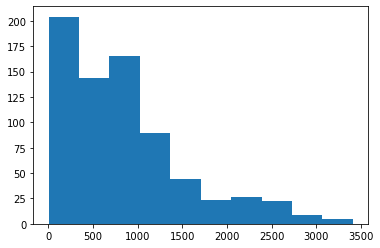

In [44]:
plt.hist(bike_sharing['casual'])
plt.show()

## Normal distribution

The histogram for the cnt column and the histogram for the casual column have different shapes.

It's useful to examine the shape of a histogram because it shows us the distribution of the values.

We often see histograms with a shape that is more or less symmetrical. If we draw a vertical line exactly in the middle of a symmetrical histogram, then we divide the histogram in two halves that are mirror images of one another.

A histogram shows the distribution of the values, and if its shape is symmetrical, then we say we have a symmetrical distribution.

One common symmetrical distribution is the normal distribution (also called Gaussian distribution).

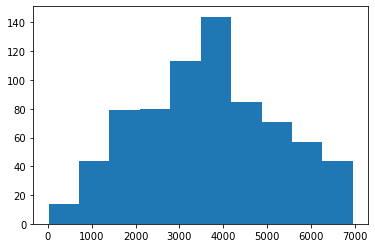

In [45]:
plt.hist(bike_sharing['registered'])
plt.show()

Another symmetrical distribution we can see in practice is the uniform distribution — the values are uniformly distributed. The bars have equal height because the intervals have equal frequencies.

symmetrical distributions - If we draw a vertical line exactly in the middle of a symmetrical histogram, then we divide it into two halves that are mirror images of one another.

Not all histogram shapes are symmetrical though. 

## Skewed Distributions

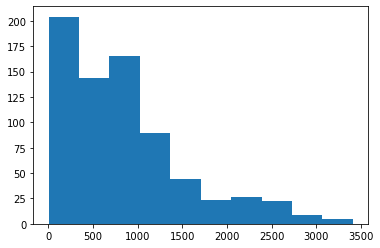

In [49]:
plt.hist(bike_sharing['casual'])
plt.show()

If the tail points to the right, then the distribution is right skewed - the distribution of the casual column is right skewed.

When the tail points to the right, it also points in the direction of positive numbers. As a consequence, right-skewed distributions are also said to have a positive skew.

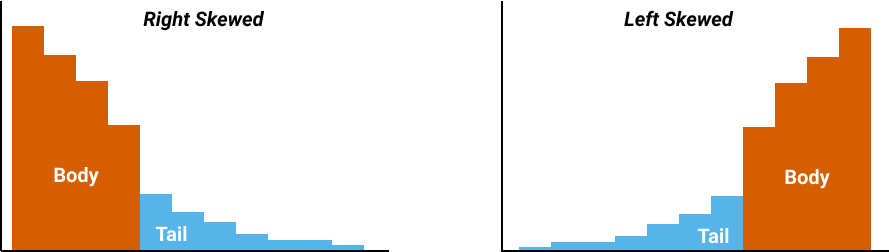

If the tail points to the left, then the distribution is said to be left skewed.

When the tail points to the left, it also points in the direction of negative numbers (on the x-axis, the numbers decrease from right to left). For this reason, a left-skewed distribution is sometimes also said to have a negative skew.




## Learnings

- How to visualize frequency tables with bar plots and histograms.
- How to plot and customize bar plots (vertical and horizontal) with Matplotlib
- How to plot and customize histograms with Matplotlib
- How to interpret bar plots and histograms.
- Some common distribution types:
        - Symmetrical: normal and uniform
        - Skewed: left and right skewed